In [1]:

file_names_weather = ['weather_data_2016-01-01','weather_data_2016-01-08','weather_data_2016-01-15',
'weather_data_2016-01-02','weather_data_2016-01-09','weather_data_2016-01-16',
'weather_data_2016-01-03',  'weather_data_2016-01-10' , 'weather_data_2016-01-17',
'weather_data_2016-01-04' , 'weather_data_2016-01-11' , 'weather_data_2016-01-18',
'weather_data_2016-01-05' , 'weather_data_2016-01-12' , 'weather_data_2016-01-19',
'weather_data_2016-01-06' , 'weather_data_2016-01-13' , 'weather_data_2016-01-20',
'weather_data_2016-01-07' , 'weather_data_2016-01-14' , 'weather_data_2016-01-21'
]
dire = '/home/salahuddin/Downloads/training_data/weather_data/'
'''for i in file_names_weather:
    with open(dire+i, "r+") as f:
        content = f.read()
        f.seek(0,0)
        f.write("time\tweather\ttemprature\tPM2.5\n")''' ,
import pandas as pd
dre = '/home/salahuddin/Downloads/training_data/order_data/'
file_names = ['order_data_2016-01-12',
 'order_data_2016-01-11',
 'order_data_2016-01-17',
 'order_data_2016-01-18',
 'order_data_2016-01-10',
 'order_data_2016-01-06',
 'order_data_2016-01-04',
 'order_data_2016-01-05',
 'order_data_2016-01-15',
 'order_data_2016-01-09',
 'order_data_2016-01-02',
 'order_data_2016-01-08',
 'order_data_2016-01-07']
'''
 'order_data_2016-01-10',
 'order_data_2016-01-16',
 'order_data_2016-01-03',
 'order_data_2016-01-16',
 'order_data_2016-01-12',
 'order_data_2016-01-07',
 'order_data_2016-01-13',
 'order_data_2016-01-08',
 'order_data_2016-01-09',
 'order_data_2016-01-20',
 'order_data_2016-01-19',
 'order_data_2016-01-21',
 'order_data_2016-01-11',
 'order_data_2016-01-05',
 'order_data_2016-01-01',
 'order_data_2016-01-13',
 'order_data_2016-01-02',
 'order_data_2016-01-21',
 'order_data_2016-01-15',
 'order_data_2016-01-20',
 'order_data_2016-01-04',
 'order_data_2016-01-03',
 'order_data_2016-01-17',
 'order_data_2016-01-14',
 'order_data_2016-01-01',
 'order_data_2016-01-19',
 'order_data_2016-01-06',
 'order_data_2016-01-18',
 'order_data_2016-01-14']
'''
import numpy as np
#for i in file_names:
#        with open(dre+i, "r+") as f:
#            content = f.read()
#            f.seek(0,0)
#            f.write("order_id\tdriver_id\tpassenger_id\tstart_region_hash\tdestination_region_hash\tprice\ttime\n" + content)

regiona = pd.read_csv('/home/salahuddin/Downloads/training_data/cluster_map/cluster_map',sep='\t',names=['Region_hash','region_id'])
regiona
    
#orderdata = pd.read_csv(dre+file_names[i],sep='\t',names=['order_id','driver','passenger','start','dest','price','time'])
orderdf = pd.concat([pd.read_csv(dre+f,sep='\t',names=['order_id','driver','passenger','start','dest','price','time']) for f in file_names],ignore_index=True)    

weatherdata = pd.read_csv(dire+file_names_weather[0],sep='\t',names=['time','weather','temp','pm2.5'])

order = np.array(orderdf)
weather = np.array(weatherdata)
region = np.array(regiona)


In [2]:

#orderdata        
#first thing regions should be made into ids
for i in order:
    for j in region:
        if i[3] == j[0]:
            i[3] = j[1]
    
        if i[4] == j[0]:
            i[4] = j[1]
            
 
#request of the same region and timeslot 
requests = []
for i in order:
    val = i[6]
    requests.append(val)
request_array = np.array(requests)
request_array[0:5]           
'''if we have time 10:46:01
   it lies in time frame 10:45:25 - 10:50:08
   -> the trend of the data is 289 seconds seconds'''
   #filtering out the data weather data
weather_time = []
finalised_array = []
for i in weather:
    weather_time.append(i[0])
weather_array = np.array(weather_time)
#print(weather_array[0])

for i in weather_array:
    splitter = i.split(" ")
    #print(splitter)
    final_one = splitter[1].split(':')
    splitter[1]=final_one
    finalised_array.append(splitter)
finalised_array_timeslot = np.array(finalised_array)
finalised_array_timeslot[0:5]
'''if we have time 10:46:01
   it lies in time frame 10:45:25 - 10:50:08
   -> the trend of the data is 289 seconds seconds'''
   #filtering out the data weather data
weather_time = []
finalised_array = []


/tmp/ipykernel_3545/2576307373.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  finalised_array_timeslot = np.array(finalised_array)


In [3]:

for i in weather:
    weather_time.append(i[0])
weather_array = np.array(weather_time)
#print(weather_array[0])

for i in weather_array:
    splitter = i.split(" ")
    #print(splitter)
    final_one = splitter[1].split(':')
    splitter[1]=final_one
    finalised_array.append(splitter)
finalised_array_timeslot = np.array(finalised_array)
 
#request array contains the time and final has slots
timer_final = []
for i in request_array:
    splitter = i.split(" ")
    #print(splitter)
    final_one = splitter[1].split(':')
    splitter[1]=final_one
    timer_final.append(splitter)
time_in_order_data = np.array(timer_final)
time_in_order_data[0:5]    
for i in range(len(finalised_array_timeslot)):
    for j in range(len(finalised_array_timeslot[i][1])):
        finalised_array_timeslot[i][1][j] = int(finalised_array_timeslot[i][1][j])



/tmp/ipykernel_3545/1684979319.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  finalised_array_timeslot = np.array(finalised_array)
/tmp/ipykernel_3545/1684979319.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  time_in_order_data = np.array(timer_final)


In [4]:
for i in range(len(time_in_order_data)):
    for j in range(len(time_in_order_data[i][1])):
        time_in_order_data[i][1][j] = int(time_in_order_data[i][1][j])
print('fa',finalised_array_timeslot[0:5])         
time_in_order_data[0]
slotted_into_timeslotes = []
for i in range(len(finalised_array_timeslot)-1):
    slotted_into_timeslotes.append(finalised_array_timeslot[i][1]+finalised_array_timeslot[i+1][1])
slotted_into_timeslotes[0:3]    
#lets replace the last column of order array with
#time_order_array data
for i,j in zip(order,time_in_order_data):
    i[6] = j
order[0]
#now we need an algorithm for defining a time into a timeslot
#first forming a tuple for each slot
tuplee = []
for i in range(len(slotted_into_timeslotes)):
    tuplee.append([i]+[slotted_into_timeslotes[i]])
slots_tuple = np.array(tuplee)
slots_tuple[0]
#now to find if falana time lies in falana slot, and add to
#order array


fa [['2016-01-01' list([0, 0, 28])]
 ['2016-01-01' list([0, 5, 24])]
 ['2016-01-01' list([0, 10, 8])]
 ['2016-01-01' list([0, 15, 27])]
 ['2016-01-01' list([0, 20, 6])]]


/tmp/ipykernel_3545/3444464671.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  slots_tuple = np.array(tuplee)


array([0, list([0, 0, 28, 0, 5, 24])], dtype=object)

In [5]:

new_array = []
DATA = []
for i in range(len(order)):
    for j in range(len(slots_tuple)):
        if order[i][6][1][0] == slots_tuple[j][1][0] or order[i][6][1][0] == (slots_tuple[j][1][0])-1:
            if slots_tuple[j][1][1] <= order[i][6][1][1] and order[i][6][1][1]<= slots_tuple[j][1][4]:
                #adds slot here
                #new_array=[]
                new_array = np.append(order[i],slots_tuple[j],axis=0)
                DATA.append(new_array)
        break        
AI_DATA = np.array(DATA)
AI_DATA[0]                
for i in range(len(AI_DATA)):
    if type(AI_DATA[i][2]) != int or type(AI_DATA[i][3]) != int:
        #AI_DATA[i][2]<1 or AI_DATA[i][2]>66 or AI_DATA[i][3]<1 or AI_DATA[i][3]>66:
        for j in range(i,len(AI_DATA)-1):
            AI_DATA[j] = AI_DATA[j+1]
df = pd.DataFrame(order)
#144 timeslotes
time_slots = []
count = 0
for i in range(0,24):
    count+=1
    time_slots.append([count]+[[i,0,0,i,9,59]])
    count+=1
    time_slots.append([count]+[[i,10,0,i,19,59]])
    count+=1
    time_slots.append([count]+[[i,20,0,i,29,59]])
    count+=1
    time_slots.append([count]+[[i,30,0,i,39,59]])
    count+=1
    time_slots.append([count]+[[i,40,0,i,49,59]])
    count+=1
    time_slots.append([count]+[[i,50,0,i,59,59]])
time_slots[0:8]    
new_array = []


In [6]:

DATA = []
for i in range(len(order)):
    for j in range(len(time_slots)):
        if order[i][6][1][0] == time_slots[j][1][0] or order[i][6][1][0] == (time_slots[j][1][0])-1:
            if time_slots[j][1][1] <= order[i][6][1][1] and order[i][6][1][1]<= time_slots[j][1][4]:
                #adds slot here
                new_=time_slots[j]
                new_array = np.append(order[i],new_,axis=0)
                DATA.append(new_array)
        break
'''PUT THE FORMULA y = (3x1 + 4x2 + 5x3 + 6x4)-6'''
count=0
for i in AI_DATA:
    if type(i[4]) !=int or type(i[3])!=int:
        '''
        for j in range(i,len(AI_DATA)-1):
            AI_DATA[j][0] = AI_DATA[j+1][0]
            AI_DATA[j][1] = AI_DATA[j+1][1]
            AI_DATA[j][2] = AI_DATA[j+1][2]
            AI_DATA[j][3] = AI_DATA[j+1][3]
            AI_DATA[j][4] = AI_DATA[j+1][4]
            AI_DATA[j][5] = AI_DATA[j+1][5]
            AI_DATA[j][6] = AI_DATA[j+1][6]
            AI_DATA[j][7] = AI_DATA[j+1][7]
            AI_DATA[j][8] = AI_DATA[j+1][8]
        '''    
        AI_DATA = np.delete(AI_DATA,count)
    count+=1    
                     
AI_DATA = np.array(DATA)
print(AI_DATA[0][3])
print(AI_DATA[7][4])
print(AI_DATA[0][7])

    

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


51
51
1


In [7]:

'''
for i in range(len(weather)):
    weather[i][0] = finalised_array_timeslot[i]
for i in range(len(AI_DATA)):
    for j in weather:
        if AI_DATA[i][6][1][0] == i[0][1][0]:
            if i[0][1][1]<=AI_DATA[i][6][1][1] and i[0][1][1]>=AI_DATA[i][6][1][1]:
                AI_DATA[i]=AI_DATA[i]+i
'''
newer = np.array(AI_DATA[:800]) 
for i in range(len(AI_DATA)):
    if type(AI_DATA[i][4]) == str:
        AI_DATA[i][4] = 0
    if type(AI_DATA[i][1]) == float:
        AI_DATA[i][1] = 0
    else:
        AI_DATA[i][1] = 1  
for i in range(len(AI_DATA)):
    var = 1
    if type(AI_DATA[i][1]) == float:
        var=0
    
    fw = AI_DATA[i][1]
    x1=AI_DATA[i][3] 
        #x2=AI_DATA[i][4]
    x3=AI_DATA[i][7]
    x4=var
    x5=0
    if type(AI_DATA[i][4]) == int:
        x5 = AI_DATA[i][4]
    else:
        x5=AI_DATA[4]
    #if type(x2)==str or type(x1)==str:
    #    x2=0
    #    x1=0
    y = ((fw*6)+(3*x1)+(5*x3)+(6*x4)+(7*x5))
    AI_DATA[i][8] = y                              
print(AI_DATA[0][3])
x_arr = []
y_arr = []


51


In [8]:

for i in range(len(AI_DATA)):
    x_arr.append(AI_DATA[i][3])
    y_arr.append(AI_DATA[i][8])
#for i in range(len(AI_DATA)):
#    if(AI_DATA[1]) == 'null':
#        AI_DATA[i][1] = 0
#    else:
#        AI_DATA[i][1] = 1               
#type(AI_DATA[0][4])
#AI_DATA
#AI_DATA = np.delete(AI_DATA,0,0)
#AI_DATA = np.delete(AI_DATA,801,0)
for i in range(len(AI_DATA)):
    AI_DATA[i][2] = AI_DATA[i][8]
    

In [9]:

for i in range(len(AI_DATA)):
    date = AI_DATA[i][6][0]
    var = np.array(AI_DATA[i])
    var = np.insert(var,1,date,axis=0)
    print(var)
    #AI_DATA[i][0] = var[0]
    #AI_DATA[i][1] = var[1]
    #AI_DATA[i][2] = var[2]
    #AI_DATA[i][3] = var[3]
    #AI_DATA[i][4] = var[4]
    #AI_DATA[i][5] = var[5]
    #AI_DATA[i][6] = var[6]
    #AI_DATA[i][7] = var[7]
    AI_DATA[i][8] = date
    #AI_DATA[i][9] = var[9]
    

['83eb538f469fab9e1008a69364e13515' '2016-01-12' 1 170 51 0 39.0
 array(['2016-01-12', list([0, 6, 52])], dtype=object) 1 170]
['b90ba9e3f9d33d1955424459138a88c6' '2016-01-12' 1 44 9 0 5.0
 array(['2016-01-12', list([0, 2, 12])], dtype=object) 1 44]
['db8f0beb0ab0c06a63d1f0b1e44956cd' '2016-01-12' 1 220 42 11 42.0
 array(['2016-01-12', list([0, 9, 56])], dtype=object) 1 220]
['b117f67e88dcb3507bd727024de57f2f' '2016-01-12' 1 273 20 28 4.0
 array(['2016-01-12', list([0, 9, 54])], dtype=object) 1 273]
['ca16084b7eecfbd6056eaec2005308cd' '2016-01-12' 1 287 27 27 11.0
 array(['2016-01-12', list([0, 4, 7])], dtype=object) 1 287]
['cd7fb4604a32086318c589f6b0bd7add' '2016-01-12' 0 281 27 27 11.0
 array(['2016-01-12', list([0, 4, 7])], dtype=object) 1 281]
['ecb1f410408e6c56ae750bdae209be8b' '2016-01-12' 1 247 23 23 12.0
 array(['2016-01-12', list([0, 2, 59])], dtype=object) 1 247]
['bd625321471df9075590f85b43567ab2' '2016-01-12' 1 416 14 51 13.0
 array(['2016-01-12', list([0, 7, 55])], dtype=

In [10]:
AI_DATA[0]
ADf = pd.DataFrame(AI_DATA)
ADf.columns=['order_id','driver','gap','start','dest','price','time','timeslot','date']
ADf.to_csv('/home/salahuddin/Downloads/DATA2.csv',index=None)
ADf2 = ADf.groupby(['date','timeslot','start'])
ADf2.first()

order_id  driver  gap  \
date       timeslot start                                                  
2016-01-02 1        1      ddf8ae784bf752f554527c44ec1a3f84       1   27   
                    2      728142c1c4a231a41b6b94638ed57c20       1   23   
                    3      7a81a7ed84dcea928b255d973891c227       0  118   
                    4      37b583710fde9d393f888b138a1cfff1       1   99   
                    6      7137cdf8c0a35b7c4f432f82042fde4c       1   77   
...                                                     ...     ...  ...   
2016-01-18 1        59     7fcd54b9ba84d776f359343bdca0c959       1  621   
                    61     d1aae1c7c76f45834441dfefb1ecf3b1       1  326   
                    64     0847f68480e5cf516531532e1934ac3f       1  657   
                    65     6007e166f4d7387882eab4ad3a0436b8       1  212   
                    66     681da139095db524845778d886e2105e       0  209   

                           dest  price                      time  
date       timeslot start                                         
2016-01-02 1        1         1   10.0  [2016-01-02, [0, 0, 49]]  
                    2         0    8.0   [2016-01-02, [0, 5, 9]]  
                    3        14   63.0  [2016-01-02, [0, 4, 17]]  
                    4        10    8.0  [2016-01-02, [0, 0, 31]]  
                    6         6   11.0  [2016-01-02, [0, 1, 34]]  
...                         ...    ...                       ...  
2016-01-18 1        59       61    6.0  [2016-01-18, [0, 0, 30]]  
                    61       18   37.0  [2016-01-18, [0, 8, 51]]  
                    64       64    6.0  [2016-01-18, [0, 4, 12]]  
                    65        0   26.0  [2016-01-18, [0, 7, 54]]  
                    66        0   43.0  [2016-01-18, [0, 1, 42]]  

[660 rows x 6 columns]

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, StringType, IntegerType,FloatType,ArrayType
spark = SparkSession.builder.appName('Data').getOrCreate()
#rdd = spark.sparkContext.parallelize(AI_DATA[0:50])
sparkdf = spark.read.csv('/home/salahuddin/Downloads/DATA2.csv',header=True,inferSchema=True)
sparkdf.show()

23/05/30 05:18:41 WARN Utils: Your hostname, salahuddin resolves to a loopback address: 127.0.1.1, but we couldn't find any external IP address!
23/05/30 05:18:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/30 05:18:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/30 05:18:42 WARN MacAddressUtil: Failed to find a usable hardware address from the network interfaces; using random bytes: e2:25:1e:1f:7e:66:65:57
+--------------------+------+---+-----+----+-----+--------------------+--------+-------------------+
|            order_id|driver|gap|start|dest|price|                time|timeslot|               date|
+--------------------+------+---+-----+----+-----+--------------------+--------+-------------------+
|83eb538f469fab9e1...|     1|170|   51|   0| 39.0|['2016-01-12' lis...|       1|2016-01-12 00:00:00|
|b90ba9e3f9d33d195...|     1| 44|    9|   0|  5.0|['2016-01-12' lis...|       1|2016-01-12 00:00:00|
|db8f0beb0ab0c06a6...|     1|220|   42|  11| 42.0|['2016-01-12' lis...|       1|2016-01-12 00:00:00|
|b117f67e88dcb3507...|     1|273|   20|  28|  4.0|['2016-01-12' lis...|       1|2016-01-12 00:00:0

In [12]:
from pyspark.ml.feature import VectorAssembler
featureassembler = VectorAssembler(inputCols=['start','price','dest','driver','timeslot'],outputCol='Independance')
output = featureassembler.transform(sparkdf)
output.show()
finalized_data = output.select('Independance','Gap')
finalized_data.show()

from pyspark.ml.regression import LinearRegression
train_data,test_data = finalized_data.randomSplit([0.7,0.3])
regressor = LinearRegression(featuresCol='Independance',labelCol='Gap')
regressor=regressor.fit(train_data)

+--------------------+------+---+-----+----+-----+--------------------+--------+-------------------+--------------------+
|            order_id|driver|gap|start|dest|price|                time|timeslot|               date|        Independance|
+--------------------+------+---+-----+----+-----+--------------------+--------+-------------------+--------------------+
|83eb538f469fab9e1...|     1|170|   51|   0| 39.0|['2016-01-12' lis...|       1|2016-01-12 00:00:00|[51.0,39.0,0.0,1....|
|b90ba9e3f9d33d195...|     1| 44|    9|   0|  5.0|['2016-01-12' lis...|       1|2016-01-12 00:00:00|[9.0,5.0,0.0,1.0,...|
|db8f0beb0ab0c06a6...|     1|220|   42|  11| 42.0|['2016-01-12' lis...|       1|2016-01-12 00:00:00|[42.0,42.0,11.0,1...|
|b117f67e88dcb3507...|     1|273|   20|  28|  4.0|['2016-01-12' lis...|       1|2016-01-12 00:00:00|[20.0,4.0,28.0,1....|
|ca16084b7eecfbd60...|     1|287|   27|  27| 11.0|['2016-01-12' lis...|       1|2016-01-12 00:00:00|[27.0,11.0,27.0,1...|
|cd7fb4604a3208631...|  

23/05/30 05:19:00 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/05/30 05:19:00 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


23/05/30 05:19:01 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
23/05/30 05:19:01 WARN Instrumentation: [44ef6346] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


In [13]:
print(regressor.coefficients)
print(regressor.intercept)
pred_result = regressor.evaluate(test_data)
pred_result.predictions.show()
train_sum = regressor.summary
print(pred_result.meanAbsoluteError,pred_result.meanSquaredError)
print(train_sum.r2)

[2.999999995577221,-1.9609490737960463e-08,6.999999973707084,5.999999414552518,0.0]
11.000001585414067
+--------------------+---+------------------+
|        Independance|Gap|        prediction|
+--------------------+---+------------------+
|[1.0,0.0,1.0,0.0,...| 21|21.000001554698372|
|[1.0,2.0,1.0,0.0,...| 21| 21.00000151547939|
|[1.0,2.0,1.0,0.0,...| 21| 21.00000151547939|
|[1.0,2.0,1.0,1.0,...| 27| 27.00000093003191|
|[1.0,3.0,1.0,1.0,...| 27|27.000000910422415|
|[1.0,3.0,1.0,1.0,...| 27|27.000000910422415|
|[1.0,3.0,1.0,1.0,...| 27|27.000000910422415|
|[1.0,3.0,1.0,1.0,...| 27|27.000000910422415|
|[1.0,4.0,1.0,0.0,...| 21|21.000001476260408|
|[1.0,4.0,1.0,0.0,...| 21|21.000001476260408|
|[1.0,4.0,1.0,0.0,...| 21|21.000001476260408|
|[1.0,4.0,1.0,0.0,...| 21|21.000001476260408|
|[1.0,4.0,1.0,1.0,...| 27|27.000000890812927|
|[1.0,4.0,1.0,1.0,...| 27|27.000000890812927|
|[1.0,4.0,1.0,1.0,...| 27|27.000000890812927|
|[1.0,4.0,1.0,1.0,...| 27|27.000000890812927|
|[1.0,4.0,1.0,1.0,...| 

In [14]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

col_names = ['order_id','driver','passenger','start','dest','price','time','timeslot','Gap']
# load dataset
feature_cols = ['start','dest','driver','timeslot','price']
bla=['gap']
X = ADf[feature_cols] # Features
y = ADf['gap'].astype(int) # Target variable
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)# 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clfa = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9537953795379538


In [15]:
y_test

15560    527
6951      86
153       74
13801    128
272      497
        ... 
17912    325
1140     241
1907     143
17317    170
13522    145
Name: gap, Length: 5454, dtype: int64

In [16]:
y_pred

array([527,  86,  74, ..., 143, 170, 145])

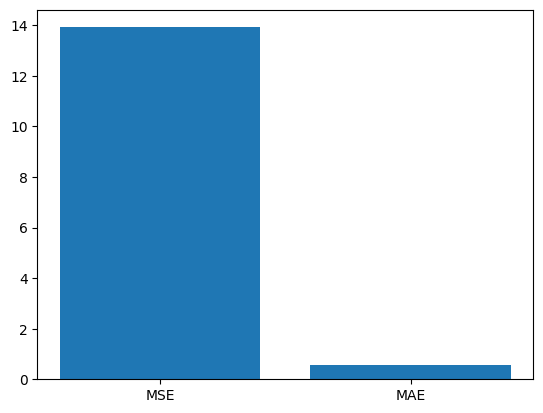

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# generate some sample data
#y_true = np.array([1, 2, 3, 4, 5])
#y_pred = np.array([1.2, 2.5, 2.8, 4.1, 5.3])

# calculate the MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# plot the results
labels = ['MSE', 'MAE']
values = [mse, mae]
plt.bar(labels, values)
plt.show()


In [18]:
#from sklearn.base import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {'max_depth': [3, 4, 5, 6, 7],
              'min_samples_split': [2, 3, 4, 5],
              'criterion': ['gini', 'entropy']}

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

tree = DecisionTreeClassifier(**grid_search.best_params_)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


/home/salahuddin/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}
Best score:  0.6986247544204323
Accuracy:  0.7123212321232123


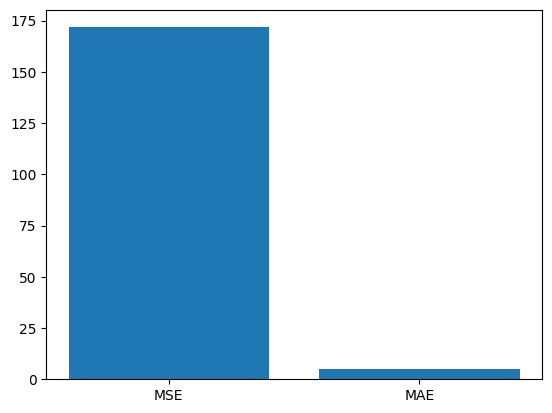

23/05/30 05:34:44 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 727153 ms exceeds timeout 120000 ms
23/05/30 05:34:44 WARN SparkContext: Killing executors is not supported by current scheduler.


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# generate some sample data
#y_true = np.array([1, 2, 3, 4, 5])
#y_pred = np.array([1.2, 2.5, 2.8, 4.1, 5.3])

# calculate the MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# plot the results
labels = ['MSE', 'MAE']
values = [mse, mae]
plt.bar(labels, values)
plt.show()
